## SENG 474 - Assignment 2
### Chris Wong - V00780634

## Import

In [1]:
import sys  
sys.path.insert(0, './utils')
import numpy as np
import pandas as pd
import mnist_reader
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

## Remove Unnecessary Data

In [2]:
df = pd.DataFrame(X_train)
df = df.assign(label = y_train)
df = df.drop(df[(df.label != 0) & (df.label != 6)].index)
df2 = pd.DataFrame(X_test)
df2 = df2.assign(label = y_test)
df2 = df2.drop(df2[(df2.label != 0) & (df2.label != 6)].index)
X_train_bin = df.drop(columns='label')
y_train_bin = df.label.to_numpy()
X_test_bin = df2.drop(columns='label')
y_test_bin = df2.label.to_numpy()

## Normalize Inputs

In [3]:
X_train_bin /= 255.0
X_test_bin /= 255.0
X_train_bin = normalize(X_train_bin)
X_test_bin = normalize(X_test_bin)

## Part 1 Logistic Regression

In [4]:
alpha_list_1 = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]
lr1_training_accuracy = []
lr1_test_accuracy = []
for i in range(10):
    lr1 = LogisticRegression(C=alpha_list_1[i], max_iter=500)
    lr1.fit(X_train_bin, y_train_bin)
    lr1_training_accuracy.append(lr1.score(X_train_bin,y_train_bin))
    lr1_test_accuracy.append(lr1.score(X_test_bin,y_test_bin))

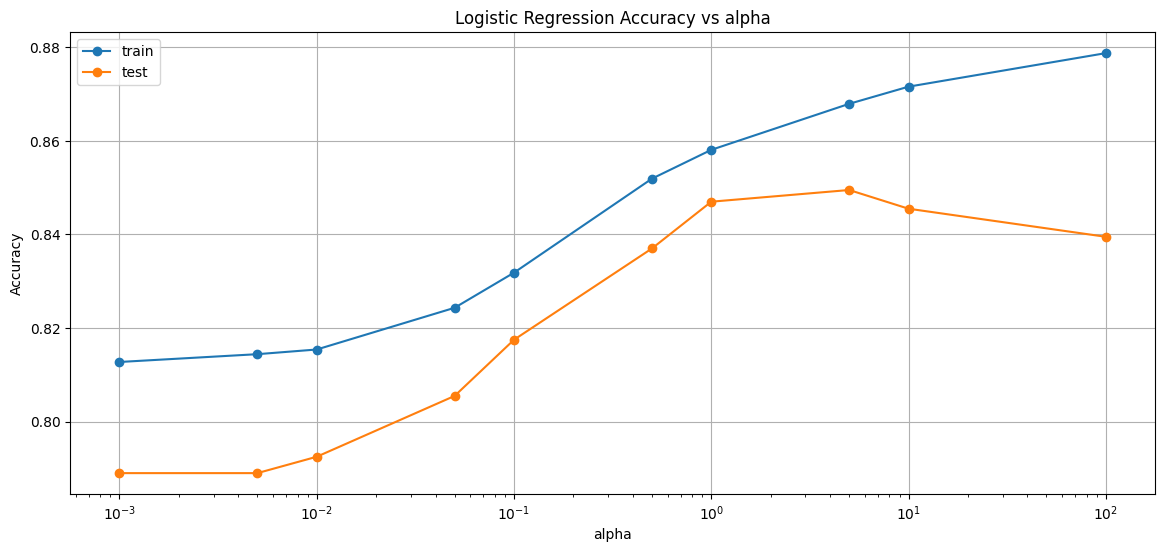

In [5]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xscale('log')
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Logistic Regression Accuracy vs alpha")
ax.plot(alpha_list_1, lr1_training_accuracy, marker='o',label="train")
ax.plot(alpha_list_1, lr1_test_accuracy, marker='o', label="test")
ax.grid('True')
ax.legend()

## Part 2 Linear SVM

In [6]:
alpha_list_2 = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]
lsvm1_training_accuracy = []
lsvm1_test_accuracy = []
for i in range(10):
    lsvm1 = LinearSVC(C=alpha_list_2[i], max_iter=2000)
    lsvm1.fit(X_train_bin, y_train_bin)
    lsvm1_training_accuracy.append(lsvm1.score(X_train_bin,y_train_bin))
    lsvm1_test_accuracy.append(lsvm1.score(X_test_bin,y_test_bin))

/home/chris/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


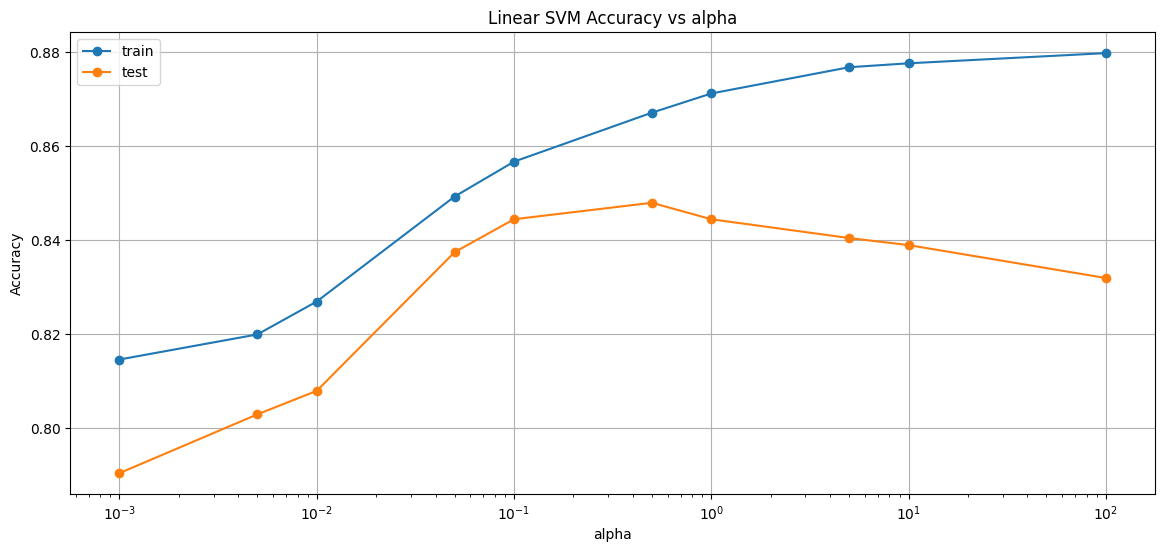

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xscale('log')
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Linear SVM Accuracy vs alpha")
ax.plot(alpha_list_2, lsvm1_training_accuracy, marker='o',label="train")
ax.plot(alpha_list_2, lsvm1_test_accuracy, marker='o', label="test")
ax.grid('True')
ax.legend()

## Part 3 k-Fold Cross Validation

### Split up the training set

In [8]:
fold_X = np.empty(10, dtype=object) 
fold_y = np.empty(10, dtype=object) 
iteration = np.empty(10, dtype=object) 
for i in range(10):
    samples = np.delete(X_train_bin, np.s_[i * 1200 : (i + 1) * 1200], axis=0)
    labels = np.delete(y_train_bin, np.s_[i * 1200 : (i + 1) * 1200], axis=0)
    iteration[i] = (samples, labels) 
    fold_X[i] = X_train_bin[i * 1200 : (i + 1) * 1200, :]
    fold_y[i] = y_train_bin[i * 1200 : (i + 1) * 1200]

### logistic regression

In [9]:
alpha_list_3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lr2_k_score = []
for i in range(10):
    lr2 = LogisticRegression(C=alpha_list_3[i], max_iter=1000)
    k_score = 0
    for j in range(10):
            lr2.fit(iteration[j][0], iteration[j][1])
            k_score += (lr2.score(fold_X[j], fold_y[j]))
    lr2_k_score.append(k_score/10)

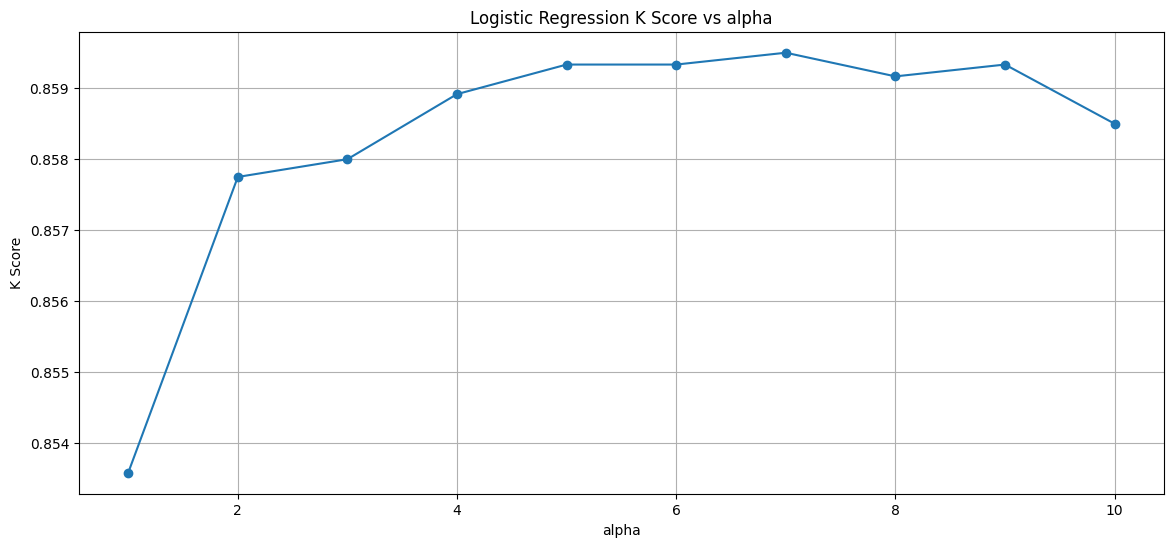

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xlabel("alpha")
ax.set_ylabel("K Score")
ax.set_title("Logistic Regression K Score vs alpha")
ax.plot(alpha_list_3, lr2_k_score, marker='o', label="K Score")
ax.grid('True')

### Linear SVM

In [11]:
alpha_list_4 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
lsvm2_k_score = []
for i in range(10):
    lsvm2 = LinearSVC(C=alpha_list_4[i])
    k_score = 0
    for j in range(10):
            lsvm2.fit(iteration[j][0], iteration[j][1])
            k_score += (lsvm2.score(fold_X[j], fold_y[j]))
    lsvm2_k_score.append(k_score/10)

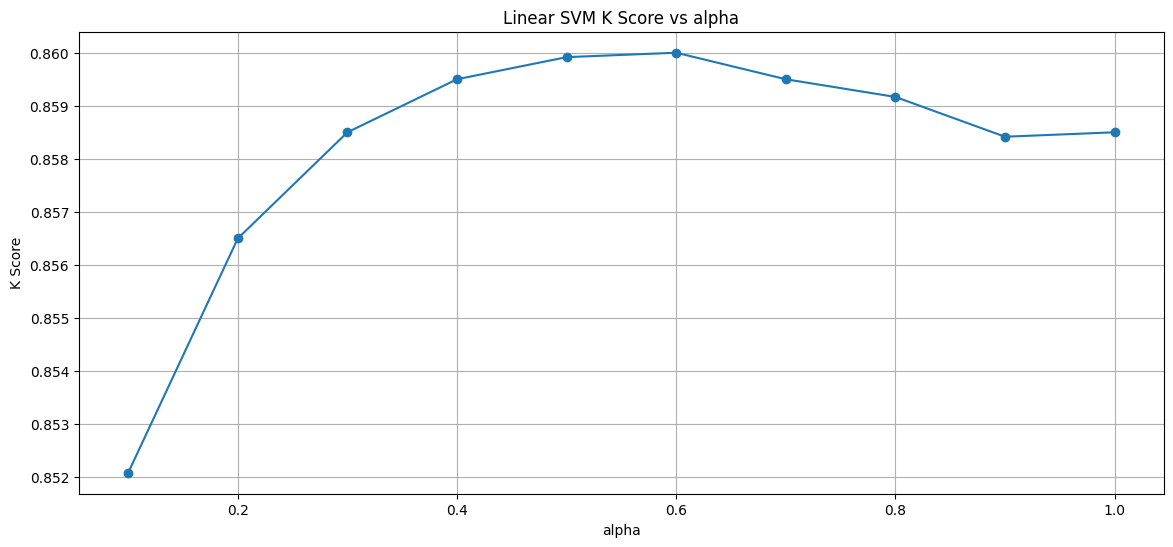

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xlabel("alpha")
ax.set_ylabel("K Score")
ax.set_title("Linear SVM K Score vs alpha")
ax.plot(alpha_list_4, lsvm2_k_score, marker='o', label="K Score")
ax.grid('True')

### Test Score Comparison

In [24]:
lr3 = LogisticRegression(C=7, max_iter=1000)
lr3.fit(X_train_bin, y_train_bin)
lr3_score = lr3.score(X_test_bin , y_test_bin)

lsvm3 = LinearSVC(C=0.6)
lsvm3.fit(X_train_bin, y_train_bin)
lsvm3_score = lsvm3.score(X_test_bin , y_test_bin)

print("Logisitic Regression Test Score:", lr3_score)
print("Linear SVM Score:", lsvm3_score)

Logisitic Regression Test Score: 0.8485
Linear SVM Score: 0.848


## Part 4 Non Linear SVM

### Find Optimal Gamma and Regularization Parameter

In [14]:
alpha_list_5 = [0.001, 0.01, 0.1, 1, 10, 100]
svm1_k_score = []
for i in range(6):
    svm1 = SVC(C=alpha_list_5[i], gamma=0.01)
    k_score = 0
    for j in range(10):
            svm1.fit(iteration[j][0], iteration[j][1])
            k_score += (svm1.score(fold_X[j], fold_y[j]))
    svm1_k_score.append(k_score/10)

svm2_k_score = []
for i in range(6):
    svm2 = SVC(C=alpha_list_5[i], gamma=0.05)
    k_score = 0
    for j in range(10):
            svm2.fit(iteration[j][0], iteration[j][1])
            k_score += (svm2.score(fold_X[j], fold_y[j]))
    svm2_k_score.append(k_score/10)
    
svm3_k_score = []
for i in range(6):
    svm3 = SVC(C=alpha_list_5[i], gamma=0.1)
    k_score = 0
    for j in range(10):
            svm3.fit(iteration[j][0], iteration[j][1])
            k_score += (svm3.score(fold_X[j], fold_y[j]))
    svm3_k_score.append(k_score/10)
    
svm4_k_score = []
for i in range(6):
    svm4 = SVC(C=alpha_list_5[i], gamma=0.5)
    k_score = 0
    for j in range(10):
            svm4.fit(iteration[j][0], iteration[j][1])
            k_score += (svm4.score(fold_X[j], fold_y[j]))
    svm4_k_score.append(k_score/10)
    
svm5_k_score = []
for i in range(6):
    svm5 = SVC(C=alpha_list_5[i], gamma=1)
    k_score = 0
    for j in range(10):
            svm5.fit(iteration[j][0], iteration[j][1])
            k_score += (svm5.score(fold_X[j], fold_y[j]))
    svm5_k_score.append(k_score/10)
    
svm6_k_score = []
for i in range(6):
    svm6 = SVC(C=alpha_list_5[i], gamma=5)
    k_score = 0
    for j in range(10):
            svm6.fit(iteration[j][0], iteration[j][1])
            k_score += (svm6.score(fold_X[j], fold_y[j]))
    svm6_k_score.append(k_score/10)
    
svm7_k_score = []
for i in range(6):
    svm7 = SVC(C=alpha_list_5[i], gamma=10)
    k_score = 0
    for j in range(10):
            svm7.fit(iteration[j][0], iteration[j][1])
            k_score += (svm7.score(fold_X[j], fold_y[j]))
    svm7_k_score.append(k_score/10)

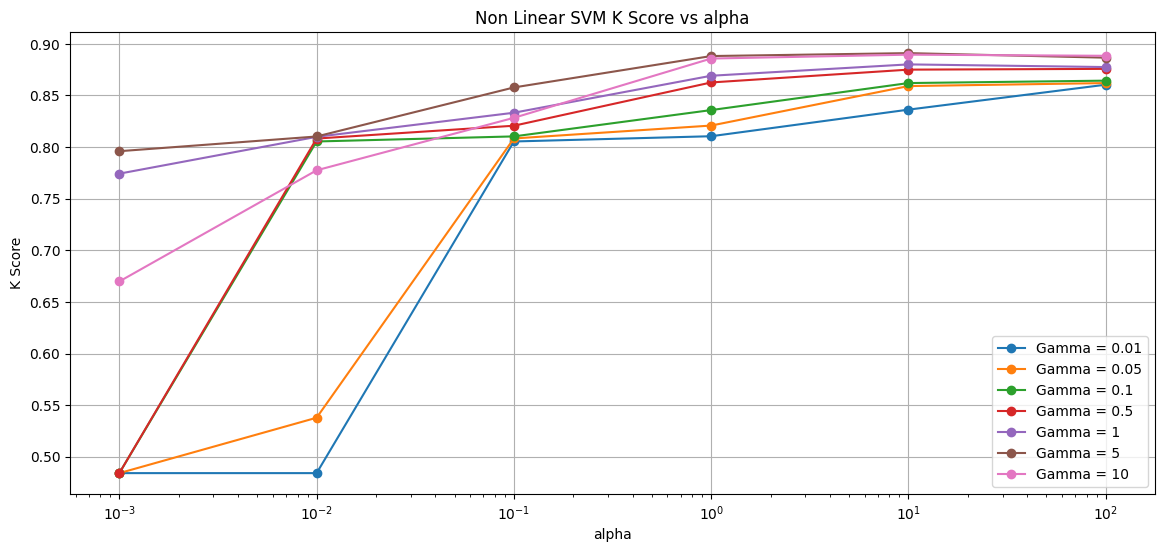

In [26]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xscale('log')
ax.set_xlabel("alpha")
ax.set_ylabel("K Score")
ax.set_title("Non Linear SVM K Score vs alpha")
ax.plot(alpha_list_5, svm1_k_score, marker='o', label="Gamma = 0.01")
ax.plot(alpha_list_5, svm2_k_score, marker='o', label="Gamma = 0.05")
ax.plot(alpha_list_5, svm3_k_score, marker='o', label="Gamma = 0.1")
ax.plot(alpha_list_5, svm4_k_score, marker='o', label="Gamma = 0.5")
ax.plot(alpha_list_5, svm5_k_score, marker='o', label="Gamma = 1")
ax.plot(alpha_list_5, svm6_k_score, marker='o', label="Gamma = 5")
ax.plot(alpha_list_5, svm7_k_score, marker='o', label="Gamma = 10")
ax.grid('True')
ax.legend()

### Tuned SVM

In [29]:
gamma_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
training_score = []
test_score = []
svm8 = SVC(C=100, gamma=gamma_list[0])
svm8.fit(X_train_bin, y_train_bin)
training_score.append(svm8.score(X_train_bin,y_train_bin))
test_score.append(svm8.score(X_test_bin,y_test_bin))

svm9 = SVC(C=100, gamma=gamma_list[1])
svm9.fit(X_train_bin, y_train_bin)
training_score.append(svm9.score(X_train_bin,y_train_bin))
test_score.append(svm9.score(X_test_bin,y_test_bin))

svm10 = SVC(C=100, gamma=gamma_list[2])
svm10.fit(X_train_bin, y_train_bin)
training_score.append(svm10.score(X_train_bin,y_train_bin))
test_score.append(svm10.score(X_test_bin,y_test_bin))

svm11 = SVC(C=10, gamma=gamma_list[3])
svm11.fit(X_train_bin, y_train_bin)
training_score.append(svm11.score(X_train_bin,y_train_bin))
test_score.append(svm11.score(X_test_bin,y_test_bin))

svm12 = SVC(C=10, gamma=gamma_list[4])
svm12.fit(X_train_bin, y_train_bin)
training_score.append(svm12.score(X_train_bin,y_train_bin))
test_score.append(svm12.score(X_test_bin,y_test_bin))

svm13 = SVC(C=10, gamma=gamma_list[5])
svm13.fit(X_train_bin, y_train_bin)
training_score.append(svm13.score(X_train_bin,y_train_bin))
test_score.append(svm13.score(X_test_bin,y_test_bin))

svm14 = SVC(C=10, gamma=gamma_list[6])
svm14.fit(X_train_bin, y_train_bin)
training_score.append(svm14.score(X_train_bin,y_train_bin))
test_score.append(svm14.score(X_test_bin,y_test_bin))

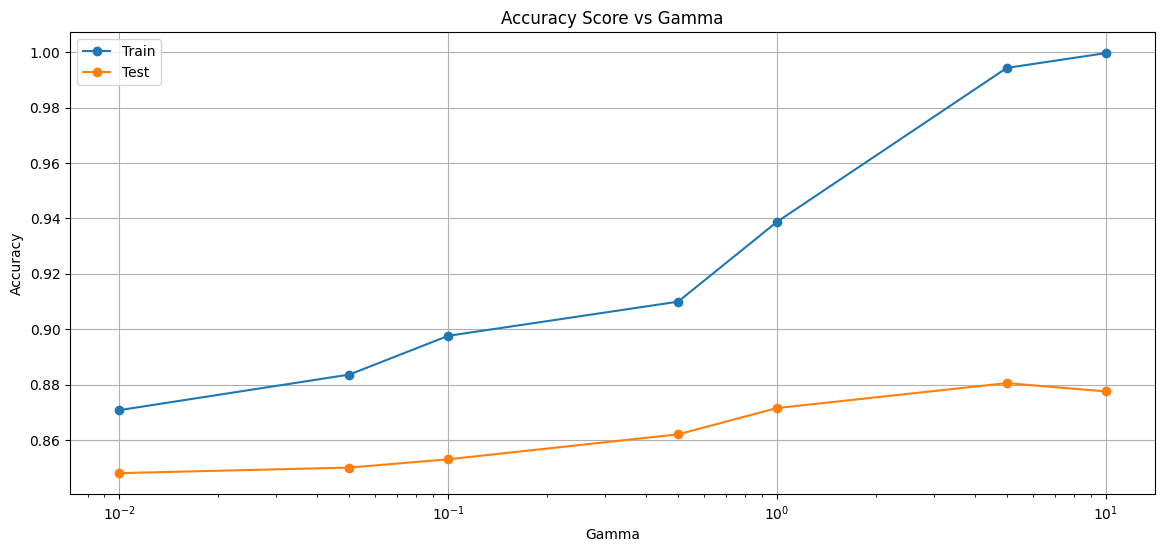

In [30]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_xscale('log')
ax.set_xlabel("Gamma")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Score vs Gamma")
ax.plot(gamma_list, training_score, marker='o', label="Train")
ax.plot(gamma_list, test_score, marker='o', label="Test")
ax.grid('True')
ax.legend()